In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

In [2]:
CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cars-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2050078%2F3411657%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240625%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240625T182419Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D867586f82bdf4c8bd0f4d33cd634a26c0acd30b41b748544e6774d8758ff144b969c84d25c79b57814d4533a0f2ef767f400f7609807c58039e5cf4beb870485c8f576d0bdf6da3e679811630266a1b58d264bc38271503f8e3b49bae0b19576f46a30457f4ab1bf2ffc782767059487e78b428f9a2ecafc010435fca539b03124114635588b7e1f8287ac501b9718f695d60f3786c4441a15325a84414da3e5fd299fe6e98e264a51a2f50fd11f92aa638d37c90f273a7ede9ca49acf588f10f9d496121475a9d900c3bfa70f9c7ee87de954e94f1396e9a2432c1db1acae2df9c790953516e03439681bf2bb7824451fe030e03118546a1db5620d3c94e314'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 38049454 bytes downloaded
Downloaded and uncompressed: cars-image-dataset
Data source import complete.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

/kaggle/input
/kaggle/input/cars-image-dataset
/kaggle/input/cars-image-dataset/Cars Dataset
/kaggle/input/cars-image-dataset/Cars Dataset/train
/kaggle/input/cars-image-dataset/Cars Dataset/train/Swift
/kaggle/input/cars-image-dataset/Cars Dataset/train/Hyundai Creta
/kaggle/input/cars-image-dataset/Cars Dataset/train/Rolls Royce
/kaggle/input/cars-image-dataset/Cars Dataset/train/Mahindra Scorpio
/kaggle/input/cars-image-dataset/Cars Dataset/train/Audi
/kaggle/input/cars-image-dataset/Cars Dataset/train/Tata Safari
/kaggle/input/cars-image-dataset/Cars Dataset/train/Toyota Innova
/kaggle/input/cars-image-dataset/Cars Dataset/test
/kaggle/input/cars-image-dataset/Cars Dataset/test/Swift
/kaggle/input/cars-image-dataset/Cars Dataset/test/Hyundai Creta
/kaggle/input/cars-image-dataset/Cars Dataset/test/Rolls Royce
/kaggle/input/cars-image-dataset/Cars Dataset/test/Mahindra Scorpio
/kaggle/input/cars-image-dataset/Cars Dataset/test/Audi
/kaggle/input/cars-image-dataset/Cars Dataset/test/

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse",
)

Found 3352 images belonging to 7 classes.


In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.31299558 0.32868186 0.26201516]
  [0.23077403 0.24470498 0.17189467]
  [0.36983424 0.37596795 0.28185028]
  ...
  [1.         0.99586445 0.9801782 ]
  [1.         0.99417025 0.978484  ]
  [1.         0.9924761  0.97678983]]

 [[0.32993725 0.34562352 0.27895686]
  [0.21213816 0.2269162  0.15707068]
  [0.367293   0.37427378 0.2801561 ]
  ...
  [1.         0.9803922  0.96470594]
  [1.         0.9803922  0.96470594]
  [1.         0.9803922  0.96470594]]

 [[0.34687898 0.36256525 0.2958986 ]
  [0.19350228 0.2091274  0.1422467 ]
  [0.36475173 0.37257957 0.27846193]
  ...
  [1.         0.98043036 0.9647212 ]
  [1.         0.9825481  0.9655683 ]
  [1.         0.9846658  0.9664154 ]]

 ...

 [[0.68235296 0.65882355 0.6666667 ]
  [0.68235296 0.65882355 0.6666667 ]
  [0.68235296 0.65882355 0.6666667 ]
  ...
  [0.8235295  0.80392164 0.79215693]
  [0.8235295  0.80392164 0.79215693]
  [0.8041892  0.78458136 0.77281666]]

 [[0.6458261  0.6222967  0.6301398 ]
  [0.64074355 0.61721414 0.6250573 ]


In [7]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/kaggle/input/cars-image-dataset/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [10]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10
105/105 [==============================] - 88s 821ms/step - loss: 1.8968 - accuracy: 0.2428 - val_loss: 1.7929 - val_accuracy: 0.3112
Epoch 2/10
105/105 [==============================] - 88s 840ms/step - loss: 1.7625 - accuracy: 0.3353 - val_loss: 1.7026 - val_accuracy: 0.3481
Epoch 3/10
105/105 [==============================] - 84s 794ms/step - loss: 1.6317 - accuracy: 0.3941 - val_loss: 1.6236 - val_accuracy: 0.4637
Epoch 4/10
105/105 [==============================] - 83s 791ms/step - loss: 1.4973 - accuracy: 0.4585 - val_loss: 1.4079 - val_accuracy: 0.5117
Epoch 5/10
105/105 [==============================] - 91s 871ms/step - loss: 1.3665 - accuracy: 0.5030 - val_loss: 1.2980 - val_accuracy: 0.5474
Epoch 6/10
105/105 [==============================] - 83s 790ms/step - loss: 1.2664 - accuracy: 0.5486 - val_loss: 1.2094 - val_accuracy: 0.5658
Epoch 7/10
105/105 [==============================] - 83s 793ms/step - loss: 1.1636 - accuracy: 0.5835 - val_loss: 1.1166 - val_ac

In [ ]:
scores = model.evaluate(test_generator)

In [ ]:
scores

In [ ]:
history.history.keys()

In [ ]:
type(history.history['loss'])

In [ ]:
len(history.history['loss'])

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
import matplotlib.pyplot as plt
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 39ms/step


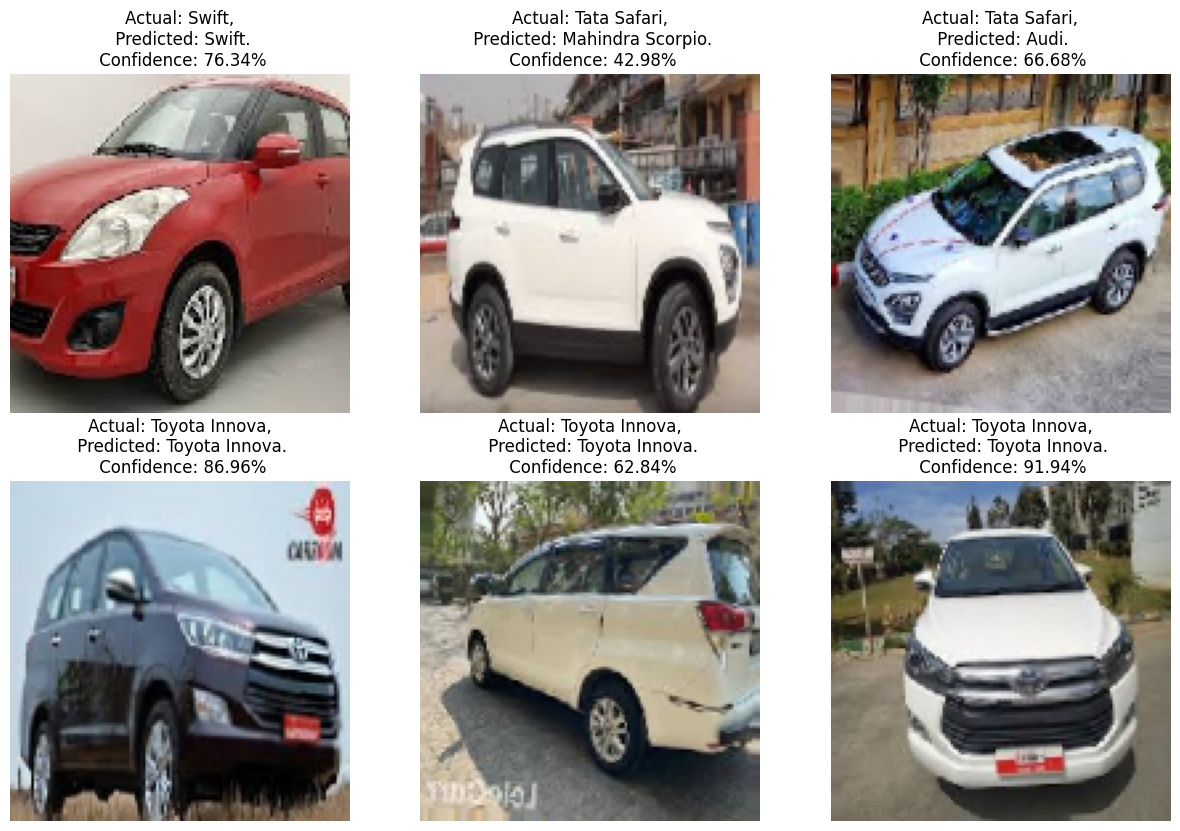

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break